In [3]:
import time
import numpy as np
import matplotlib.pyplot as plt
import random
import time
from scipy.optimize import fsolve
import math
from sympy import Symbol, nsolve
from scipy.optimize import curve_fit
from scipy.integrate import solve_ivp
from numpy.random import rand

In [31]:

start=time.time()
print()


N=2 #number of oscillators

tf=200 #final time
t_inte=10000 #total number of time steps

#epsilon parameter
eps=[0.01, 0.1]

#other parameters
alpha1=3.1
alpha2=5
alpha3=1
alpha4=4
beta=2
eta=2
gamma=2
de=1
d=0.008


# Define derivative function
def f_der(t, z, alpha1,alpha2,alpha3,alpha4,beta,eta,gamma,de,d,eps):
    dzdt=np.zeros(3*N+1)
    for i in range (N):
        dzdt[i] = alpha1/(1+z[i+N]**beta)-z[i]+alpha3*z[i+2*N]**eta/(1+z[i+2*N]**eta)
        
        dzdt[i+N] = alpha2/(1+z[i]**gamma)-z[i+N]
        
        dzdt[i+2*N]=eps[i]*(alpha4/(1+z[i]**gamma)-z[i+2*N])+2*d*(z[3*N]-z[i+2*N])

        sum_coupling=0
        for j in range (N):
            sum_coupling+=(-z[3*N]+z[i+2*N])
            
        dzdt[3*N] = de*sum_coupling/N
    return dzdt


# Define time spans and initial values

tspan = np.linspace(0, tf, t_inte)

zinit=np.zeros(3*N+1)
epsilon=1
for i in range (N):
    zinit[i] = epsilon*np.random.uniform(0, 1)
    zinit[i+N] = epsilon*np.random.uniform(0, 1)
    zinit[i+2*N] = epsilon*np.random.uniform(0, 1)
    zinit[3*N] = epsilon*np.random.uniform(0, 1)

zinit=[0.6787958,  0.87009246, 0.25548844, 0.63005963, 0.07110232, 0.57949967, 0.26254823]

# Solve equations numerically
sol = solve_ivp(lambda t, z: f_der(t, z, alpha1,alpha2,alpha3,alpha4,beta,eta,gamma,de,d,eps)
                , [tspan[0], tspan[-1]], zinit, t_eval=tspan, rtol = 1e-5)



end=time.time()
print()
print("O tempo usado na solução foi: ")
print(end-start)



O tempo usado na solução foi: 
0.025017261505126953


In [ ]:
#Data is stored in sol.y[i], time steps are stored in sol.t

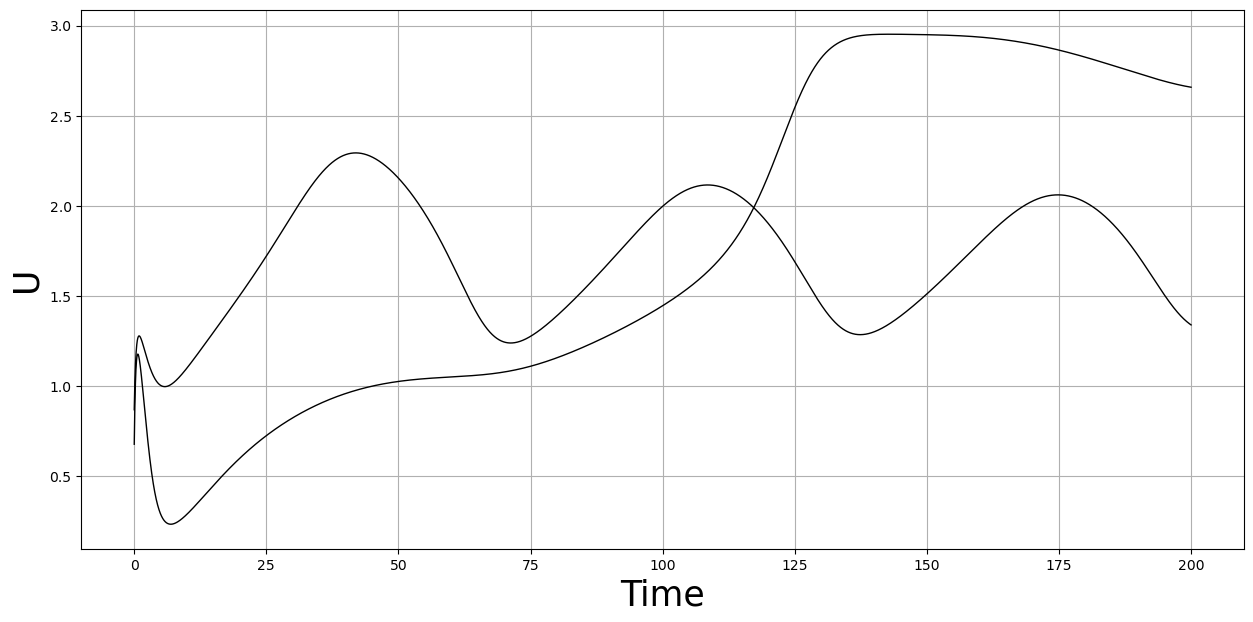


O tempo usado na solução foi: 
0.07767510414123535


In [32]:
start=time.time()
print()

fig,ax=plt.subplots(figsize=(15,7))
fig.patch.set_facecolor('white')

for n in range(0,N):
    plt.xlabel('Time',color='black',fontsize=25)
    plt.ylabel('U',color='black',fontsize=25)
    plt.plot(sol.t, sol.y[n], color='black', linewidth=1, label=r'P1(t)')

plt.grid()
plt.show()

end=time.time()
print()
print("O tempo usado na solução foi: ")
print(end-start)

In [ ]:
start=time.time()
print()

fig,ax=plt.subplots(figsize=(15,7))
fig.patch.set_facecolor('gold')
#FP=[(-f-q+1+np.sqrt((f+q-1)**2+4*q*(f+1)))/2 for i in range (len(sol.t))]

for n in range(N,2*N):
    plt.xlabel('Time',color='blue',fontsize=25)
    plt.ylabel('V',color='blue',fontsize=25)
    plt.plot(sol.t, sol.y[n], color='black', linewidth=1, label=r'P1(t)')
    #plt.plot(sol.t, FP, color='red', linewidth=1, label=r'Fixed Point')
#plt.xlim(810,820)
#plt.ylim(0,5)
plt.grid()
plt.show()

end=time.time()
print()
print("O tempo usado na solução foi: ")
print(end-start)

In [ ]:
start=time.time()
print()

fig,ax=plt.subplots(figsize=(15,7))
fig.patch.set_facecolor('gold')
#FP=[(-f-q+1+np.sqrt((f+q-1)**2+4*q*(f+1)))/2 for i in range (len(sol.t))]

for n in range(2*N,3*N):
    plt.xlabel('Time',color='blue',fontsize=25)
    plt.ylabel('$\omega$',color='blue',fontsize=25)
    plt.plot(sol.t, sol.y[n], color='black', linewidth=1, label=r'P1(t)')
    #plt.plot(sol.t, FP, color='red', linewidth=1, label=r'Fixed Point')
#plt.xlim(810,820)
#plt.ylim(0,5)
plt.grid()
plt.show()

end=time.time()
print()
print("O tempo usado na solução foi: ")
print(end-start)

In [ ]:
start=time.time()
print()

fig,ax=plt.subplots(figsize=(15,7))
fig.patch.set_facecolor('gold')
#FP=[(-f-q+1+np.sqrt((f+q-1)**2+4*q*(f+1)))/2 for i in range (len(sol.t))]

plt.xlabel('Time',color='blue',fontsize=25)
plt.ylabel('$\omega_{e}$',color='blue',fontsize=25)
plt.plot(sol.t, sol.y[3*N], color='black', linewidth=1, label=r'P1(t)')
#plt.plot(sol.t, FP, color='red', linewidth=1, label=r'Fixed Point')
#plt.xlim(810,820)
#plt.ylim(0,5)
plt.grid()
plt.show()

end=time.time()
print()
print("O tempo usado na solução foi: ")
print(end-start)